# Research Based Heart Disease Prediction Model Using Ensemble Learning

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
dataset=pd.read_csv('Heart_dataset.csv')

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [4]:
#Description of dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


0    164
1    139
Name: target, dtype: int64
Percentage of patients without disease: 54.13
Percentage of patients with disease: 45.87


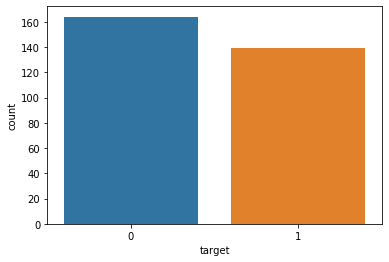

In [5]:
#Counting the number of patients "with disease" and "without disease"
sns.countplot(dataset['target'])
target_numbers = dataset.target.value_counts()
print(target_numbers)

print("Percentage of patients without disease:",round(target_numbers[0]*100/303,2))
print("Percentage of patients with disease:",round(target_numbers[1]*100/303,2))

In [6]:
#checking for any missing values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
dataset=dataset.dropna()

In [8]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [9]:
#checking for any missing values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

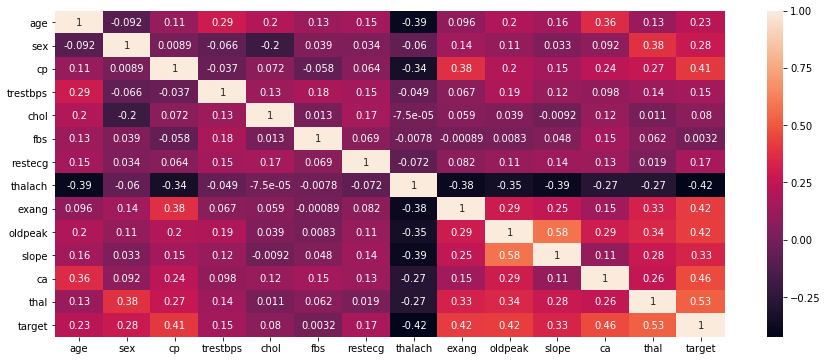

In [10]:
#plotting correlation values between all the variables
plt.figure(figsize=(15,6))
sns.heatmap(dataset.corr(),annot=True)

In [11]:
#Values in target column
print(dataset['target'].unique())

[0 1]


0    160
1    137
Name: target, dtype: int64
Percentage of patients without disease: 52.81
Percentage of patients with disease: 45.21


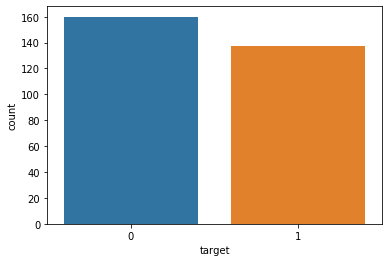

In [12]:
#Counting the number of patients "with disease" and "without disease"
sns.countplot(dataset['target'])
target_numbers = dataset.target.value_counts()
print(target_numbers)

print("Percentage of patients without disease:",round(target_numbers[0]*100/303,2))
print("Percentage of patients with disease:",round(target_numbers[1]*100/303,2))


In [13]:
#adding dummy variables to deal with categorical variables
dataset=pd.get_dummies(dataset,columns=['cp','slope','ca','thal','restecg'])

In [14]:
#taking the independent and dependent values
x=dataset.drop(['target'],axis=1).values
y=dataset['target'].values

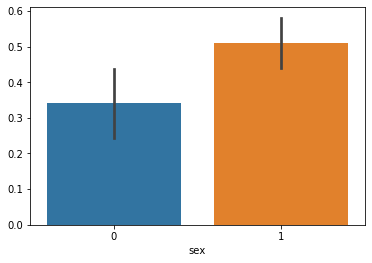

In [15]:
#graph shows that male are more likely to have heart disease
sns.barplot(dataset["sex"],y)

In [16]:
#dividing the dataset into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [17]:
#performing scaling on all values so as to prevent any one variable to dominate over the other
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
train_x=scx.fit_transform(train_x)
test_x=scx.transform(test_x)

In [18]:
#K-Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'n_neighbors':np.arange(1,10)}]
grid_search=GridSearchCV(knn,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_knn=grid_search.best_estimator_
print('knn :{}'.format(best_knn.score(test_x,test_y)))

y_pred_knn=best_knn.predict(test_x)
cm=confusion_matrix(test_y,y_pred_knn)
print(cm)


{'n_neighbors': 5}
knn :0.7666666666666667
[[26  6]
 [ 8 20]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


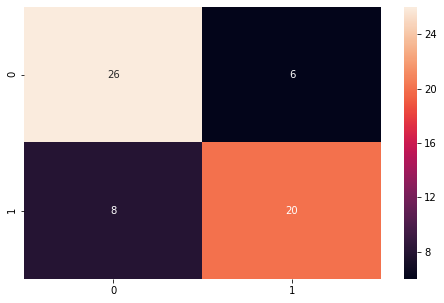

In [19]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [20]:
#Calculating Sensitivity and Specificity
sensitivity_KNN = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_KNN : ', sensitivity_KNN )

specificity_KNN = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_KNN : ', specificity_KNN)

sensitivity_KNN=round(sensitivity_KNN*100,2)
print(sensitivity_KNN)
specificity_KNN=round(specificity_KNN*100,2)
print(specificity_KNN)

Sensitivity_KNN :  0.7142857142857143
Specificity_KNN :  0.8125
71.43
81.25


In [21]:
#Calculating PPV and NPV
precision_KNN = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_KNN : ', precision_KNN )

negative_predictive_value_KNN = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_KNN : ', negative_predictive_value_KNN)

precision_KNN=round(precision_KNN*100,2)
print(precision_KNN)
negative_predictive_value_KNN=round(negative_predictive_value_KNN*100,2)
print(negative_predictive_value_KNN)

Precision_KNN :  0.7692307692307693
Negative_Predictive_Value_KNN :  0.7647058823529411
76.92
76.47


In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'n_estimators':[100,150,200]}]
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_rfc=grid_search.best_estimator_
print('rfc :{}'.format(best_rfc.score(test_x,test_y)))

y_pred_rfc=best_rfc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_rfc)
print(cm)


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 150}
rfc :0.8
[[27  5]
 [ 7 21]]


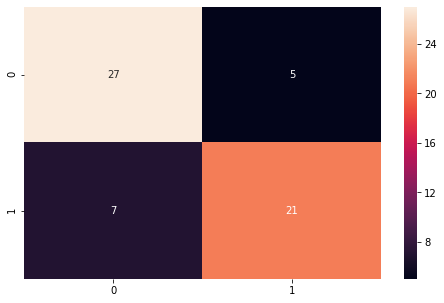

In [23]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [24]:
#Calculating Sensitivity and Specificity
sensitivity_RFC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_RFC : ', sensitivity_RFC )

specificity_RFC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_RFC : ', specificity_RFC)

sensitivity_RFC=round(sensitivity_RFC*100,2)
print(sensitivity_RFC)
specificity_RFC=round(specificity_RFC*100,2)
print(specificity_RFC)

Sensitivity_RFC :  0.75
Specificity_RFC :  0.84375
75.0
84.38


In [25]:
#Calculating PPV and NPV
precision_RFC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_RFC : ', precision_RFC )

negative_predictive_value_RFC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_RFC : ', negative_predictive_value_RFC)

precision_RFC=round(precision_RFC*100,2)
print(precision_RFC)
negative_predictive_value_RFC=round(negative_predictive_value_RFC*100,2)
print(negative_predictive_value_RFC)

Precision_RFC :  0.8076923076923077
Negative_Predictive_Value_RFC :  0.7941176470588235
80.77
79.41


In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'max_depth':[3,None]},
             {'min_samples_leaf':np.arange(1,10)},
             {'criterion':['gini','entropy']}]
grid_search=GridSearchCV(dtc,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_dtc=grid_search.best_estimator_
print('dtc :{}'.format(best_dtc.score(test_x,test_y)))

y_pred_dtc=best_dtc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_dtc)
print(cm)

{'min_samples_leaf': 8}
dtc :0.8166666666666667
[[31  1]
 [10 18]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


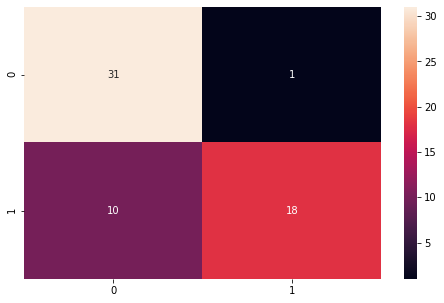

In [27]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [28]:
#Calculating Sensitivity and Specificity
sensitivity_DTC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_DTC : ', sensitivity_DTC )

specificity_DTC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_DTC : ', specificity_DTC)

sensitivity_DTC=round(sensitivity_DTC*100,2)
print(sensitivity_DTC)
specificity_DTC=round(specificity_DTC*100,2)
print(specificity_DTC)

Sensitivity_DTC :  0.6428571428571429
Specificity_DTC :  0.96875
64.29
96.88


In [29]:
#Calculating PPV and NPV
precision_DTC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_DTC : ', precision_DTC )

negative_predictive_value_DTC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_DTC : ', negative_predictive_value_DTC)

precision_DTC=round(precision_DTC*100,2)
print(precision_DTC)
negative_predictive_value_DTC=round(negative_predictive_value_DTC*100,2)
print(negative_predictive_value_DTC)

Precision_DTC :  0.9473684210526315
Negative_Predictive_Value_DTC :  0.7560975609756098
94.74
75.61


In [30]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(train_x,train_y)

print('nbc: {}'.format(nbc.score(test_x,test_y)))

y_pred_nbc=nbc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_nbc)
print(cm)

nbc: 0.8666666666666667
[[30  2]
 [ 6 22]]


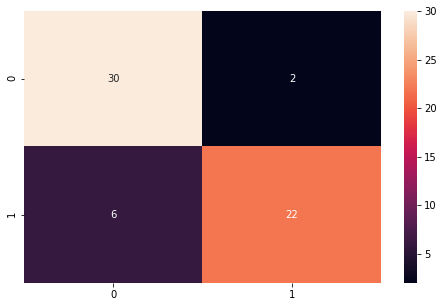

In [31]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [32]:
#Calculating Sensitivity and Specificity
sensitivity_NBC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_NBC : ', sensitivity_NBC )

specificity_NBC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_NBC : ', specificity_NBC)

sensitivity_NBC=round(sensitivity_NBC*100,2)
print(sensitivity_NBC)
specificity_NBC=round(specificity_NBC*100,2)
print(specificity_NBC)

Sensitivity_NBC :  0.7857142857142857
Specificity_NBC :  0.9375
78.57
93.75


In [33]:
#Calculating PPV and NPV
precision_NBC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_NBC : ', precision_NBC )

negative_predictive_value_NBC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_NBC : ', negative_predictive_value_NBC)

precision_NBC=round(precision_NBC*100,2)
print(precision_NBC)
negative_predictive_value_NBC=round(negative_predictive_value_NBC*100,2)
print(negative_predictive_value_NBC)

Precision_NBC :  0.9166666666666666
Negative_Predictive_Value_NBC :  0.8333333333333334
91.67
83.33


In [34]:
#Support Vector Machine
from sklearn.svm import SVC
svc_scores = []

#Finding the best kernel in terms of accuracies
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(train_x,train_y)
    svc_scores.append(svc_classifier.score(test_x, test_y))
    
print(svc_scores)

#Applying the best kernel 
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'sigmoid', random_state = 0,probability=True)
#classifier2=svm.SVC(probability=True)
classifier2.fit(train_x, train_y)
print('kernel: {}'.format(classifier2.score(test_x, test_y)))

y_pred_svc=classifier2.predict(test_x)
cm=confusion_matrix(test_y,y_pred_svc)
print(cm)

[0.85, 0.8, 0.8333333333333334, 0.8666666666666667]
kernel: 0.8666666666666667
[[30  2]
 [ 6 22]]


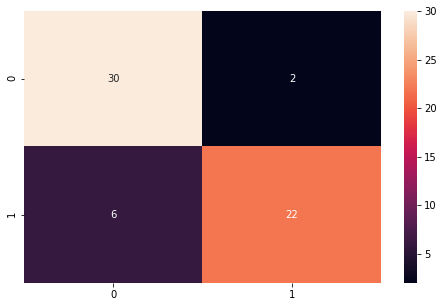

In [35]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [36]:
#Calculating Sensitivity and Specificity
sensitivity_SVC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_SVC : ', sensitivity_SVC )

specificity_SVC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_SVC : ', specificity_SVC)

sensitivity_SVC=round(sensitivity_SVC*100,2)
print(sensitivity_SVC)
specificity_SVC=round(specificity_SVC*100,2)
print(specificity_SVC)


Sensitivity_SVC :  0.7857142857142857
Specificity_SVC :  0.9375
78.57
93.75


In [37]:
#Calculating PPV and NPV
precision_SVC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_SVC : ', precision_SVC )

negative_predictive_value_SVC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_SVC : ', negative_predictive_value_SVC)

precision_SVC=round(precision_SVC*100,2)
print(precision_SVC)
negative_predictive_value_SVC=round(negative_predictive_value_SVC*100,2)
print(negative_predictive_value_SVC)

Precision_SVC :  0.9166666666666666
Negative_Predictive_Value_SVC :  0.8333333333333334
91.67
83.33


In [38]:
#XGBOOST
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_x, train_y)

#GridSearchCV to find the optimal values of hyperparameters
parameters={'n_estimators':[80,100,150,200],'max_depth':np.arange(3,10),'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2,0.225,0.25,0.275,0.3]}
grid_search=GridSearchCV(xgb_model,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_xgb=grid_search.best_estimator_
y_pred_xgb=best_xgb.predict(test_x)
print('xgb :{}'.format(best_xgb.score(test_x,test_y)))

y_pred_xgboost=best_xgb.predict(test_x)
cm=confusion_matrix(test_y,y_pred_xgboost)
print(cm)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
xgb :0.7666666666666667
[[26  6]
 [ 8 20]]


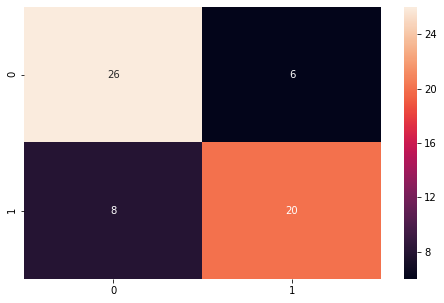

In [39]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [40]:
#Calculating Sensitivity and Specificity
sensitivity_XG = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_XG : ', sensitivity_XG )

specificity_XG = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_XG : ', specificity_XG)

sensitivity_XG=round(sensitivity_XG*100,2)
print(sensitivity_XG)
specificity_XG=round(specificity_XG*100,2)
print(specificity_XG)

Sensitivity_XG :  0.7142857142857143
Specificity_XG :  0.8125
71.43
81.25


In [41]:
#Calculating PPV and NPV
precision_XG =cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_XG : ', precision_XG )

negative_predictive_value_XG = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_XG : ', negative_predictive_value_XG)

precision_XG=round(precision_XG*100,2)
print(precision_XG)
negative_predictive_value_XG=round(negative_predictive_value_XG*100,2)
print(negative_predictive_value_XG)

Precision_XG :  0.7692307692307693
Negative_Predictive_Value_XG :  0.7647058823529411
76.92
76.47


In [42]:
#LightGBM
import lightgbm as lgb
estimator = lgb.LGBMClassifier()

#GridSearchCV to find the optimal values of hyperparameters
param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1,cv=5)
grid.fit(train_x, train_y)

print (grid.best_params_)
best_light=grid.best_estimator_
y_pred_lightgbm=best_light.predict(test_x)
print('light :{}'.format(best_light.score(test_x,test_y)))

'''estimator1 = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 60, num_leaves = 38)
estimator1.fit(train_x,train_y)

print(estimator1.score(test_x,test_y))
'''
y_pred_lightboost=best_light.predict(test_x)
cm=confusion_matrix(test_y,y_pred_lightboost)
print(cm)


{'learning_rate': 0.15, 'n_estimators': 20}
light :0.8333333333333334
[[28  4]
 [ 6 22]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


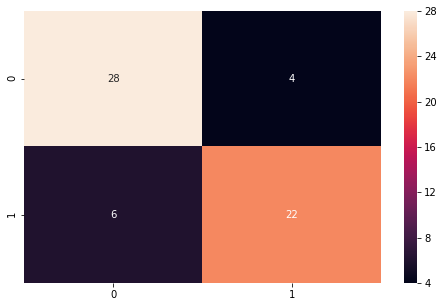

In [43]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [44]:
#Calculating Sensitivity and Specificity
sensitivity_LIGHT = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_LIGHT : ', sensitivity_LIGHT )

specificity_LIGHT = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_LIGHT : ', specificity_LIGHT)

sensitivity_LIGHT=round(sensitivity_LIGHT*100,2)
print(sensitivity_LIGHT)
specificity_LIGHT=round(specificity_LIGHT*100,2)
print(specificity_LIGHT)

Sensitivity_LIGHT :  0.7857142857142857
Specificity_LIGHT :  0.875
78.57
87.5


In [45]:
#Calculating PPV and NPV
precision_LIGHT = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_LIGHT : ', precision_LIGHT )

negative_predictive_value_LIGHT = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_LIGHT : ', negative_predictive_value_LIGHT)

precision_LIGHT=round(precision_LIGHT*100,2)
print(precision_LIGHT)
negative_predictive_value_LIGHT=round(negative_predictive_value_LIGHT*100,2)
print(negative_predictive_value_LIGHT)

Precision_LIGHT :  0.8461538461538461
Negative_Predictive_Value_LIGHT :  0.8235294117647058
84.62
82.35


In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

y_pred_logistic=classifier.predict(test_x)
print('logistic :{}'.format(classifier.score(test_x,test_y)))

y_pred_logistic=classifier.predict(test_x)
cm=confusion_matrix(test_y,y_pred_logistic)
print(cm)

logistic :0.8666666666666667
[[29  3]
 [ 5 23]]


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


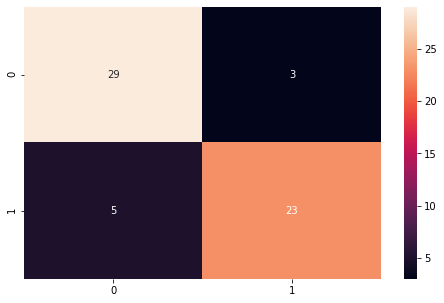

In [47]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [48]:
#Calculating Sensitivity and Specificity
sensitivity_Logistic = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Logistic : ', sensitivity_Logistic )

specificity_Logistic = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Logistic : ', specificity_Logistic)

sensitivity_Logistic=round(sensitivity_Logistic*100,2)
print(sensitivity_Logistic)
specificity_Logistic=round(specificity_Logistic*100,2)
print(specificity_Logistic)

Sensitivity_Logistic :  0.8214285714285714
Specificity_Logistic :  0.90625
82.14
90.62


In [49]:
#Calculating PPV and NPV
precision_LOGISTIC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_LOGISTIC : ', precision_LOGISTIC )

negative_predictive_value_LOGISTIC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_LOGISTIC : ', negative_predictive_value_LOGISTIC)

precision_LOGISTIC=round(precision_LOGISTIC*100,2)
print(precision_LOGISTIC)
negative_predictive_value_LOGISTIC=round(negative_predictive_value_LOGISTIC*100,2)
print(negative_predictive_value_LOGISTIC)

Precision_LOGISTIC :  0.8846153846153846
Negative_Predictive_Value_LOGISTIC :  0.8529411764705882
88.46
85.29


In [50]:
#Multi model ensemble formation (LR and SVC)
from sklearn.ensemble import VotingClassifier
estimators=[('logistic',classifier),('svc',classifier2)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(train_x, train_y)
print("Ensemble of LR and SVC")
ensemble_accuracy=round(ensemble.score(test_x,test_y)*100,2)
print("Accuracy of the new multi model classifier is:",ensemble.score(test_x, test_y))
print(ensemble_accuracy) 


y_pred_ensemble1=ensemble.predict(test_x)
cm=confusion_matrix(test_y,y_pred_ensemble1)
print(cm)

Ensemble of LR and SVC
Accuracy of the new multi model classifier is: 0.8833333333333333
88.33
[[31  1]
 [ 6 22]]


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


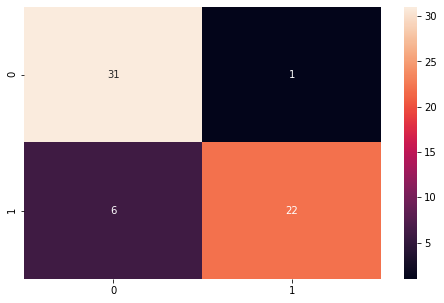

In [51]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [52]:
#Calculating Sensitivity and Specificity
sensitivity_Ensemble1 = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Ensemble1 : ', sensitivity_Ensemble1 )

specificity_Ensemble1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Ensemble1 : ', specificity_Ensemble1)

sensitivity_Ensemble1=round(sensitivity_Ensemble1*100,2)
print(sensitivity_Ensemble1)
specificity_Ensemble1=round(specificity_Ensemble1*100,2)
print(specificity_Ensemble1)

Sensitivity_Ensemble1 :  0.7857142857142857
Specificity_Ensemble1 :  0.96875
78.57
96.88


In [53]:
#Calculating PPV and NPV
precision_ENSEMBLE1 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_ENSEMBLE1 : ', precision_ENSEMBLE1 )

negative_predictive_value_ENSEMBLE1 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_ENSEMBLE1 : ', negative_predictive_value_ENSEMBLE1)

precision_ENSEMBLE1=round(precision_ENSEMBLE1*100,2)
print(precision_ENSEMBLE1)
negative_predictive_value_ENSEMBLE1=round(negative_predictive_value_ENSEMBLE1*100,2)
print(negative_predictive_value_ENSEMBLE1)

Precision_ENSEMBLE1 :  0.9565217391304348
Negative_Predictive_Value_ENSEMBLE1 :  0.8378378378378378
95.65
83.78


In [54]:
#Multi model ensemble formation (RFC,NBC,SVC and LGBM)
from sklearn.ensemble import VotingClassifier
estimators=[('rfc',best_rfc),('lgbm',best_light),('nbc',nbc),('svc',classifier2)]
ensemble1 = VotingClassifier(estimators, voting='hard')
ensemble1.fit(train_x, train_y)
print("Ensemble of Logistic Regression, XGB and RFC")
ensemble_accuracy1=round(ensemble1.score(test_x,test_y)*100,2)
print("Accuracy of the new multi model classifier is:",ensemble1.score(test_x, test_y))
print(ensemble_accuracy1) 

y_pred_ensemble2=ensemble1.predict(test_x)
cm=confusion_matrix(test_y,y_pred_ensemble2)
print(cm)

Ensemble of Logistic Regression, XGB and RFC
Accuracy of the new multi model classifier is: 0.8833333333333333
88.33
[[31  1]
 [ 6 22]]


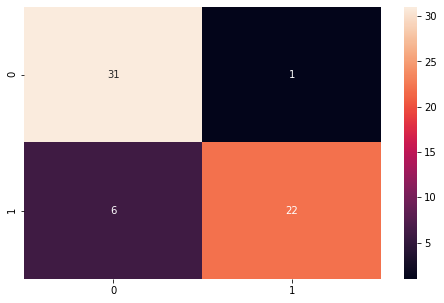

In [55]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [56]:
#Calculating Sensitivity and Specificity
sensitivity_Ensemble2 = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Ensemble2 : ', sensitivity_Ensemble2 )

specificity_Ensemble2 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Ensemble2 : ', specificity_Ensemble2)

sensitivity_Ensemble2=round(sensitivity_Ensemble2*100,2)
print(sensitivity_Ensemble2)
specificity_Ensemble2=round(specificity_Ensemble2*100,2)
print(specificity_Ensemble2)

Sensitivity_Ensemble2 :  0.7857142857142857
Specificity_Ensemble2 :  0.96875
78.57
96.88


In [57]:
#Calculating PPV and NPV
precision_ENSEMBLE2 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_ENSEMBLE2 : ', precision_ENSEMBLE2 )

negative_predictive_value_ENSEMBLE2 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_ENSEMBLE2 : ', negative_predictive_value_ENSEMBLE2)

precision_ENSEMBLE2=round(precision_ENSEMBLE2*100,2)
print(precision_ENSEMBLE2)
negative_predictive_value_ENSEMBLE2=round(negative_predictive_value_ENSEMBLE2*100,2)
print(negative_predictive_value_ENSEMBLE2)

Precision_ENSEMBLE2 :  0.9565217391304348
Negative_Predictive_Value_ENSEMBLE2 :  0.8378378378378378
95.65
83.78


In [58]:
#Printing the accuracies of all models implemented above
from sklearn.metrics import accuracy_score

score_lr = round(accuracy_score(test_y,y_pred_logistic)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

score_nb = round(accuracy_score(test_y,y_pred_nbc)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

score_svm = round(accuracy_score(test_y,y_pred_svc)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

score_knn = round(accuracy_score(test_y,y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

score_dt = round(accuracy_score(test_y,y_pred_dtc)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

score_rf = round(accuracy_score(test_y,y_pred_rfc)*100,2)
print("The accuracy score achieved using Regression Tree is: "+str(score_rf)+" %")

score_xgb = round(accuracy_score(test_y,y_pred_xgb)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

score_lightgbm=round(accuracy_score(test_y,y_pred_lightgbm)*100,2)
print("The accuracy score achieved using LightGBM is: "+str(score_lightgbm)+" %")


The accuracy score achieved using Logistic Regression is: 86.67 %
The accuracy score achieved using Naive Bayes is: 86.67 %
The accuracy score achieved using Linear SVM is: 86.67 %
The accuracy score achieved using KNN is: 76.67 %
The accuracy score achieved using Decision Tree is: 81.67 %
The accuracy score achieved using Regression Tree is: 80.0 %
The accuracy score achieved using XGBoost is: 76.67 %
The accuracy score achieved using LightGBM is: 83.33 %


The accuracy achieved using Logistic Regression is: 86.67 %
The accuracy achieved using Naive Bayes is: 86.67 %
The accuracy achieved using SVM is: 86.67 %
The accuracy achieved using K-NN is: 76.67 %
The accuracy achieved using Decision Tree is: 81.67 %
The accuracy achieved using Random Forest is: 80.0 %
The accuracy achieved using XGBoost is: 76.67 %
The accuracy achieved using LightGBM is: 83.33 %
The accuracy achieved using (LR + SVC) is: 88.33 %
The accuracy achieved using (RFC + NBC + SVC + LGBM) is: 88.33 %


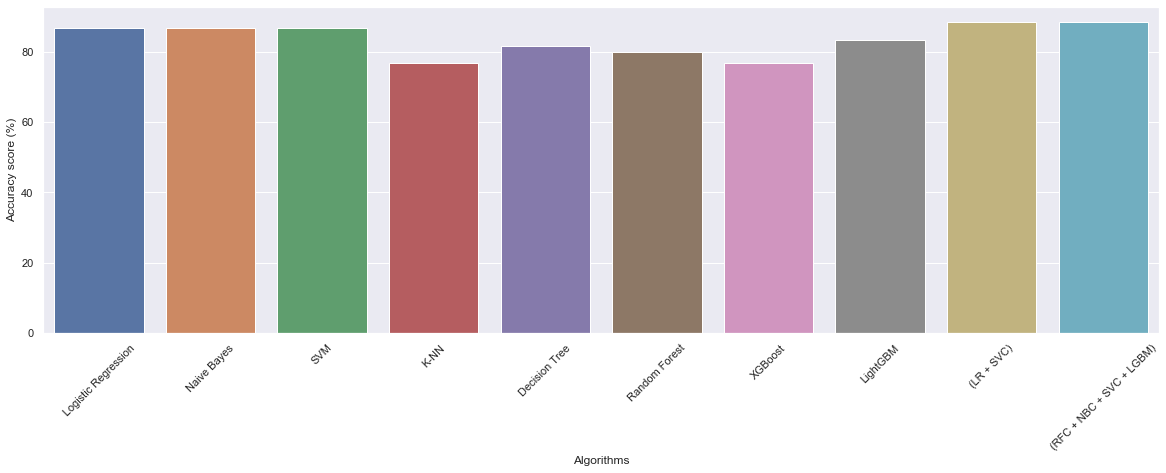

In [67]:
#Bar Graph showing the accuracies of all models including the ensembles formed
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_lightgbm,ensemble_accuracy,ensemble_accuracy1]
algorithms = ["Logistic Regression","Naive Bayes","SVM","K-NN","Decision Tree","Random Forest","XGBoost","LightGBM","(LR + SVC)","(RFC + NBC + SVC + LGBM)"]    

for i in range(len(algorithms)):
    print("The accuracy achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    
sns.set(rc={'figure.figsize':(20,6)})
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.ylabel("Accuracy score (%)")
sns.barplot(algorithms,scores)

In [60]:
#AUC-ROC curve for all the models "EXCEPT THE ENSEMBLES FORMED"
r_probs = [0 for _ in range(len(test_y))]
SVC_probs = classifier2.predict_proba(test_x)
KNN_probs=best_knn.predict_proba(test_x)
DTC_probs=best_dtc.predict_proba(test_x)
RFC_probs=best_rfc.predict_proba(test_x)
NBC_probs=nbc.predict_proba(test_x)
XGB_probs=best_xgb.predict_proba(test_x)
LGBM_probs = best_light.predict_proba(test_x)
LG_probs=classifier.predict_proba(test_x)
print(SVC_probs)

#Taking only the positive values
SVC_probs=SVC_probs[:,1]
KNN_probs=KNN_probs[:,1]
DTC_probs=DTC_probs[:,1]
RFC_probs=RFC_probs[:,1]
NBC_probs=NBC_probs[:,1]
XGB_probs=XGB_probs[:,1]
LGBM_probs=LGBM_probs[:,1]
LG_probs=LG_probs[:,1]

[[0.6794053  0.3205947 ]
 [0.01573639 0.98426361]
 [0.1726542  0.8273458 ]
 [0.14397691 0.85602309]
 [0.06508202 0.93491798]
 [0.63930407 0.36069593]
 [0.19452866 0.80547134]
 [0.11575457 0.88424543]
 [0.19101979 0.80898021]
 [0.0857553  0.9142447 ]
 [0.54286663 0.45713337]
 [0.5415761  0.4584239 ]
 [0.67115334 0.32884666]
 [0.74188272 0.25811728]
 [0.03488799 0.96511201]
 [0.98384223 0.01615777]
 [0.09904478 0.90095522]
 [0.64398869 0.35601131]
 [0.66459242 0.33540758]
 [0.96115909 0.03884091]
 [0.03699925 0.96300075]
 [0.45989513 0.54010487]
 [0.6101707  0.3898293 ]
 [0.92146888 0.07853112]
 [0.90445756 0.09554244]
 [0.55411572 0.44588428]
 [0.13605801 0.86394199]
 [0.16193353 0.83806647]
 [0.97516929 0.02483071]
 [0.59107243 0.40892757]
 [0.63594436 0.36405564]
 [0.9256269  0.0743731 ]
 [0.72885283 0.27114717]
 [0.6957035  0.3042965 ]
 [0.15232349 0.84767651]
 [0.63810531 0.36189469]
 [0.93920059 0.06079941]
 [0.96788043 0.03211957]
 [0.2201705  0.7798295 ]
 [0.33950925 0.66049075]


In [61]:
print(SVC_probs)

[0.3205947  0.98426361 0.8273458  0.85602309 0.93491798 0.36069593
 0.80547134 0.88424543 0.80898021 0.9142447  0.45713337 0.4584239
 0.32884666 0.25811728 0.96511201 0.01615777 0.90095522 0.35601131
 0.33540758 0.03884091 0.96300075 0.54010487 0.3898293  0.07853112
 0.09554244 0.44588428 0.86394199 0.83806647 0.02483071 0.40892757
 0.36405564 0.0743731  0.27114717 0.3042965  0.84767651 0.36189469
 0.06079941 0.03211957 0.7798295  0.66049075 0.12949382 0.40514256
 0.15893909 0.05859192 0.97245459 0.81029877 0.06688273 0.06716297
 0.79576635 0.05906631 0.90392691 0.04260854 0.8258871  0.90457302
 0.43007459 0.64506965 0.17875564 0.16380203 0.14088852 0.05899806]


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
r_auc = roc_auc_score(test_y, r_probs)
SVC_auc = roc_auc_score(test_y, SVC_probs)
KNN_auc = roc_auc_score(test_y, KNN_probs)
DTC_auc = roc_auc_score(test_y, DTC_probs)
RFC_auc = roc_auc_score(test_y, RFC_probs)
NBC_auc = roc_auc_score(test_y, NBC_probs)
XGB_auc = roc_auc_score(test_y, XGB_probs)
LGBM_auc = roc_auc_score(test_y, LGBM_probs)
LG_auc = roc_auc_score(test_y, LG_probs)

In [64]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('SVC: AUROC = %.3f' % (SVC_auc))
print('KNN: AUROC = %.3f' % (KNN_auc))
print('DTC: AUROC = %.3f' % (DTC_auc))
print('RFC: AUROC = %.3f' % (RFC_auc))
print('NBC: AUROC = %.3f' % (NBC_auc))
print('XGB: AUROC = %.3f' % (XGB_auc))
print('LGBM: AUROC = %.3f' % (LGBM_auc))
print('LG: AUROC = %.3f' % (LG_auc))

Random (chance) Prediction: AUROC = 0.500
SVC: AUROC = 0.933
KNN: AUROC = 0.874
DTC: AUROC = 0.874
RFC: AUROC = 0.912
NBC: AUROC = 0.922
XGB: AUROC = 0.876
LGBM: AUROC = 0.912
LG: AUROC = 0.933


In [65]:
r_fpr, r_tpr, _ = roc_curve(test_y, r_probs)
svc_fpr, svc_tpr, _ = roc_curve(test_y, SVC_probs)
knn_fpr, knn_tpr, _ = roc_curve(test_y, KNN_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(test_y, DTC_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(test_y, RFC_probs)
nbc_fpr, nbc_tpr, _ = roc_curve(test_y, NBC_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(test_y, XGB_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(test_y, LGBM_probs)
lg_fpr, lg_tpr, _ = roc_curve(test_y, LG_probs)

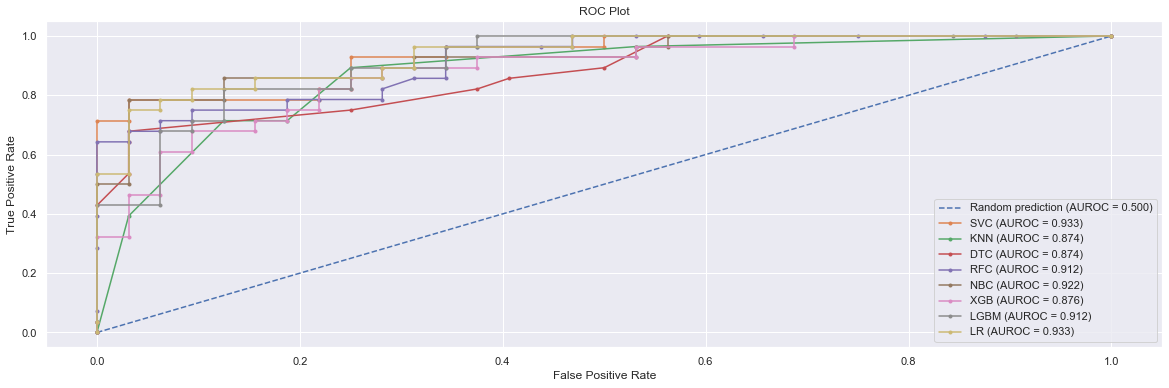

In [66]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % SVC_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC (AUROC = %0.3f)' % DTC_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC (AUROC = %0.3f)' % RFC_auc)
plt.plot(nbc_fpr, nbc_tpr, marker='.', label='NBC (AUROC = %0.3f)' % NBC_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB (AUROC = %0.3f)' % XGB_auc)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % LGBM_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LR (AUROC = %0.3f)' % LG_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# End of Project